# IoT Lab 

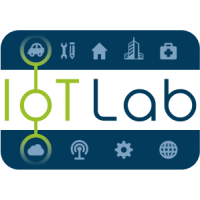

In [1]:
from PIL import Image
im = Image.open("iot_polimi.png")
im

## Import packages and data

In [1]:
import numpy as np
import pandas as pd
import requests
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import json
pd.set_option('display.max_rows', None)

In [2]:
babd_light_z1 = pd.read_csv('babd_light_z1.csv', sep= "\t")
babd_light_z2 = pd.read_csv('babd_light_z2.csv', sep= "\t")
babd_light_z3 = pd.read_csv('babd_light_z3.csv', sep= "\t")
babd_light_z3A = pd.read_csv('babd_light_z3A.csv', sep= "\t")
babd_movement_z1 = pd.read_csv('babd_movement_z1.csv', sep= "\t")
babd_movement_z2 = pd.read_csv('babd_movement_z2.csv', sep= "\t")
babd_movement_z3 = pd.read_csv('babd_movement_z3.csv', sep= "\t")
babd_movement_z3A = pd.read_csv('babd_movement_z3A.csv', sep= "\t")

## Data observation/cleaning

In [4]:
babd_light_z1

,timestamp,zone,sensor,id,value,unit_of_measure
0,2019-02-25 01:00:00,1,LDR,1,12,pitic
1,2019-02-25 01:00:20,1,LDR,1,19,pitic
2,2019-02-25 01:00:40,1,LDR,1,19,pitic
3,2019-02-25 01:01:00,1,LDR,1,18,pitic
4,2019-02-25 01:01:20,1,LDR,1,18,pitic
...,...,...,...,...,...,...
104782,2019-03-22 14:11:29,1,LDR,1,1001,pitic
104783,2019-03-22 14:11:49,1,LDR,1,1001,pitic
104784,2019-03-22 14:12:09,1,LDR,1,999,pitic
104785,2019-03-22 14:12:29,1,LDR,1,1000,pitic


In [3]:
babd_light_z1.timestamp = pd.to_datetime(babd_light_z1.timestamp) 
babd_light_z1['Week/Year'] = babd_light_z1['timestamp'].apply(lambda x: "%d/%d" % (x.week, x.year))

In [7]:
#babd_light_z3A

In [8]:
babd_light_z1.nunique()

timestamp          104785
zone                    1
sensor                  1
id                      1
value                 929
unit_of_measure         1
Week/Year               4
dtype: int64

In [9]:
babd_light_z2.nunique()

timestamp          64911
zone                   1
sensor                 1
id                     2
value                930
unit_of_measure        1
dtype: int64

In [10]:
babd_light_z3.nunique()

timestamp          115564
zone                    1
sensor                  1
id                      1
value                 940
unit_of_measure         1
dtype: int64

In [11]:
babd_light_z3A.nunique()

timestamp          102853
zone                    1
sensor                  1
id                      1
value                 936
unit_of_measure         1
dtype: int64

In [12]:
babd_light_z1.value.value_counts()

1024    24621
19      16745
20      14035
12       5933
14       4384
        ...  
222         2
472         2
241         1
140         1
699         1
Name: value, Length: 929, dtype: int64

In [13]:
babd_movement_z1.nunique()

timestamp     7371
zone             1
sensor           1
id               1
n_passages       1
dtype: int64

In [14]:
#babd_movement_z1

In [15]:
#babd_movement_z2

In [16]:
babd_movement_z2.nunique()

timestamp     10501
zone              1
sensor            1
id                1
n_passages        1
dtype: int64

In [17]:
#babd_movement_z1

## Counting the number of passages per week

In [18]:
#timestamp considered as an object instead of a datetime variable
babd_movement_z1.dtypes

timestamp     object
zone           int64
sensor        object
id             int64
n_passages     int64
dtype: object

In [4]:
babd_movement_z1.timestamp = pd.to_datetime(babd_movement_z1.timestamp) 
babd_movement_z2.timestamp = pd.to_datetime(babd_movement_z2.timestamp)
babd_movement_z3.timestamp = pd.to_datetime(babd_movement_z3.timestamp) 
babd_movement_z3A.timestamp = pd.to_datetime(babd_movement_z3.timestamp) 
#timestamp type correction

In [5]:
#timestamp type correction
babd_movement_z1['Week/Year'] = babd_movement_z1['timestamp'].apply(lambda x: "%d/%d" % (x.week, x.year))
babd_movement_z2['Week/Year'] = babd_movement_z2['timestamp'].apply(lambda x: "%d/%d" % (x.week, x.year))
babd_movement_z3['Week/Year'] = babd_movement_z3['timestamp'].apply(lambda x: "%d/%d" % (x.week, x.year))
babd_movement_z3A['Week/Year'] = babd_movement_z3A['timestamp'].apply(lambda x: "%d/%d" % (x.week, x.year))


In [21]:
#babd_light_z1['day'] = babd_light_z1['timestamp'].apply(lambda x: "%d" % (x.day))
#babd_light_z1 = babd_light_z1.drop(columns=["day"])


In [22]:
#count the total number of passages per week for zone 1
babd_movement_z1.groupby(['Week/Year','zone','id']).sum()

,,,n_passages
Week/Year,zone,id,
10/2019,1,1,2051
11/2019,1,1,2619
12/2019,1,1,1885
13/2019,1,1,712
9/2019,1,1,107


In [23]:
#count the total number of passages per week for zone 2
babd_movement_z2.groupby(['Week/Year','zone','id']).sum()

,,,n_passages
Week/Year,zone,id,
10/2019,2,2,6924
11/2019,2,2,2662
9/2019,2,2,915


In [24]:
#count the total number of passages per week for zone 3
babd_movement_z3.groupby(['Week/Year','zone','id']).sum()

,,,n_passages
Week/Year,zone,id,
10/2019,3,3,837
11/2019,3,3,885
12/2019,3,3,635
13/2019,3,3,279
9/2019,3,3,338


In [25]:
#count the total number of passages per week for zone 3A
babd_movement_z3A.groupby(['Week/Year','zone','id']).sum()

,,,n_passages
Week/Year,zone,id,
9/2019,3,4,69


## Counting the number of passages for all the zones, weekly and hourly

In [6]:
movement = babd_movement_z1.append([babd_movement_z2,babd_movement_z3,babd_movement_z3A])

In [7]:
movement['hour_of_timestamp'] = movement['timestamp'].dt.hour
movement['day_of_timestamp'] = movement['timestamp'].dt.day
count_movement_per_hour = movement.groupby('hour_of_timestamp').sum()
print(count_movement_per_hour)

                   zone    id  n_passages  day_of_timestamp
hour_of_timestamp                                          
7                   753   753         371              5130
8                  2351  2351        1093             12361
9                  4630  4659        2583             30071
10                 4534  4574        2503             25762
11                 4328  4328        2389             20333
12                 4443  4443        2470             23148
13                 3224  3224        1896             17619
14                 3659  3659        2053             18377
15                 3193  3193        1835             18105
16                 3455  3455        1861             19863
17                 1953  1953        1126             11798
18                  694   694         463              5527
19                  157   157         144              2068
20                  131   131         131              1834


In [8]:
a=count_movement_per_day = movement.groupby('day_of_timestamp').sum()
#print(a)

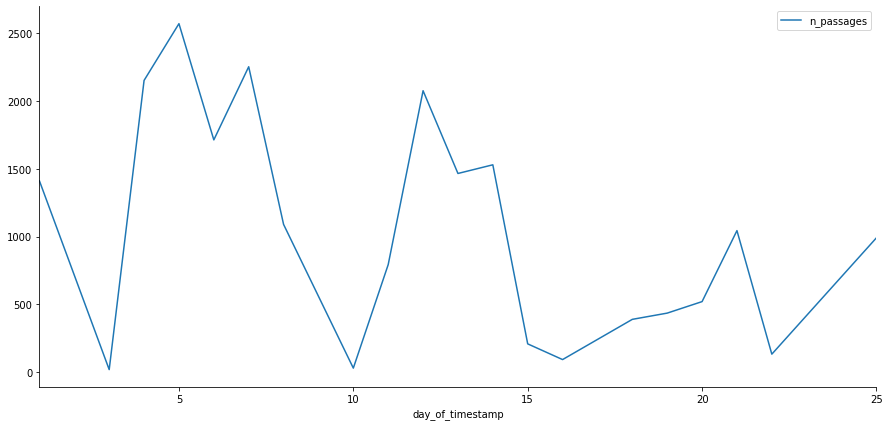

In [32]:
plt.figure(figsize=(15, 7))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)

a.plot(y='n_passages',ax=ax)

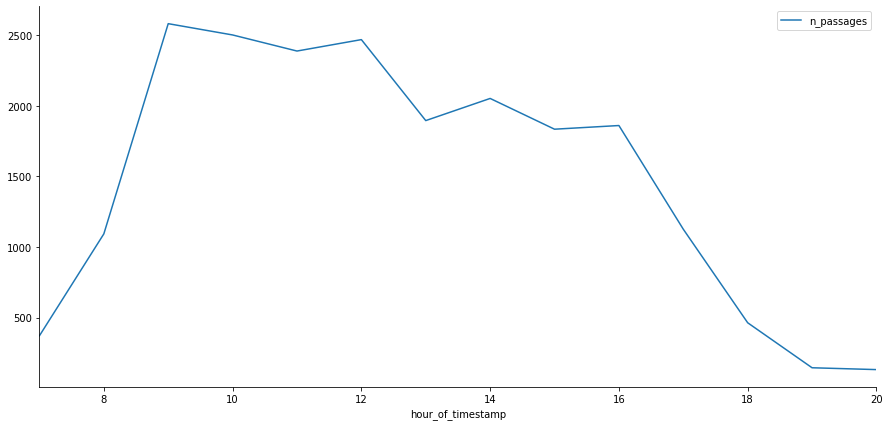

In [33]:
plt.figure(figsize=(15, 7))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)

count_movement_per_hour.plot(y='n_passages',ax=ax)

In [34]:
movement.groupby(['Week/Year','zone','id']).sum()
# not consistent; no passage records for all the weeks i.e for zone 3A
# just 1 record for week 9

hour_of_timestamp  n_passages  day_of_timestamp
Week/Year zone id                                                 
10/2019   1    1               25783        2051             12094
          2    2               87914        6924             39564
          3    3                9974         837              4886
11/2019   1    1               34756        2619             33971
          2    2               32156        2662             33618
          3    3               10467         885             11128
12/2019   1    1               23041        1885             37592
          3    3                6439         635             12903
13/2019   1    1                8628         712             17800
          3    3                3679         279              6975
9/2019    1    1                1229         107               119
          2    2               10614         915               925
          3    3                3719         338               352
               4                 661          69                69

In [35]:
movement.groupby(['Week/Year']).sum()
# highest number of passages during week 10, followed by 11 and 12
# lowest number of passages during week 9

,hour_of_timestamp,id,n_passages,zone,day_of_timestamp
Week/Year,,,,,
10/2019,123671,18410,9812,18410,56544
11/2019,77379,10598,6166,10598,78717
12/2019,29480,3790,2520,3790,50495
13/2019,12307,1549,991,1549,24775
9/2019,16223,3227,1429,3158,1465


In [36]:
# sum of number of passages hourly for each week (all zones)
c=movement.groupby(['Week/Year','hour_of_timestamp']).sum()

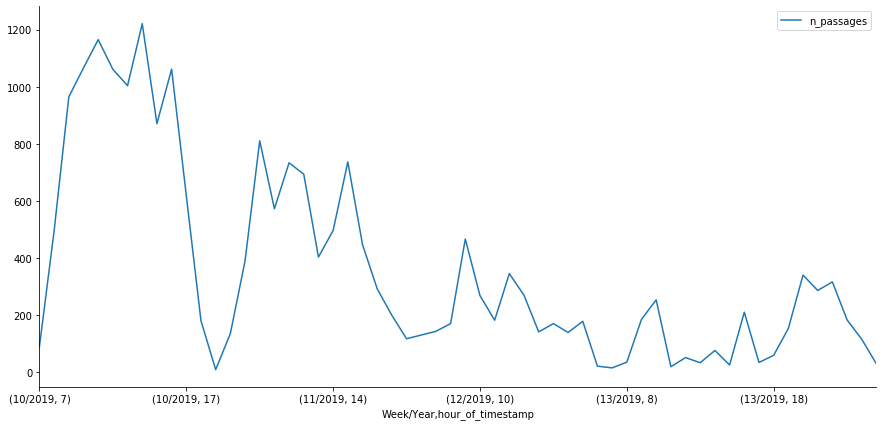

In [37]:
plt.figure(figsize=(15, 7))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
c.plot(y='n_passages',ax=ax)

## Light analysis

In [ ]:
#timestamp type correction
lux = babd_light_z1.append([babd_light_z2,babd_light_z3,babd_light_z3A], sort=True)
lux.timestamp = pd.to_datetime(lux.timestamp) 
lux['Week/Year'] = lux['timestamp'].apply(lambda x: "%d/%d" % (x.week, x.year))
lux['weekday'] = lux['timestamp'].dt.weekday+1
lux['hour_of_timestamp'] = lux['timestamp'].dt.hour
lux

In [39]:
#Creation of two tables, one with the average per hour and per day
lux_f = lux.drop(columns=["id","sensor","weekday","zone","unit_of_measure"])
lux_f['weekday'] = lux_f['timestamp'].dt.weekday+1
lux_f1 = lux_f[["timestamp","Week/Year", "weekday","hour_of_timestamp", "value" ]]
lux_f2 =  lux_f1.groupby(['weekday','hour_of_timestamp']).mean()
lux_f2

value
weekday hour_of_timestamp          
1       1                  7.938821
        2                  7.865876
        3                  7.899963
        4                  7.909563
        5                  8.013353
...                             ...
7       19                 7.796665
        20                 7.727399
        21                 7.631774
        22                 7.697728
        23                 7.513201

[161 rows x 1 columns]

## JSON File import and DataFrame transformation

In [40]:
forecast = json.load(open("forecast.json"))

In [41]:
forecast

{'cod': '200',
 'message': 0.0062,
 'cnt': 38,
 'list': [{'dt': 1554098400,
   'main': {'temp': 280.03,
    'temp_min': 276.749,
    'temp_max': 280.03,
    'pressure': 1018.65,
    'sea_level': 1018.65,
    'grnd_level': 991.8,
    'humidity': 66,
    'temp_kf': 3.29},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01d'}],
   'clouds': {'all': 0},
   'wind': {'speed': 2.27, 'deg': 1.50006},
   'sys': {'pod': 'd'},
   'dt_txt': '2019-04-01 06:00:00'},
  {'dt': 1554109200,
   'main': {'temp': 291.39,
    'temp_min': 288.93,
    'temp_max': 291.39,
    'pressure': 1018.74,
    'sea_level': 1018.74,
    'grnd_level': 992.52,
    'humidity': 55,
    'temp_kf': 2.46},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '02d'}],
   'clouds': {'all': 8},
   'wind': {'speed': 1.81, 'deg': 41.5031},
   'sys': {'pod': 'd'},
   'dt_txt': '2019-04-01 09:00:00'},
  {'dt': 1554120000,
   'main': {'temp': 292.

In [42]:
pd.DataFrame(forecast['list'])

,dt,main,weather,clouds,wind,sys,dt_txt,rain
0,1554098400,"{'temp': 280.03, 'temp_min': 276.749, 'temp_ma...","[{'id': 800, 'main': 'Clear', 'description': '...",{'all': 0},"{'speed': 2.27, 'deg': 1.50006}",{'pod': 'd'},2019-04-01 06:00:00,NaN
1,1554109200,"{'temp': 291.39, 'temp_min': 288.93, 'temp_max...","[{'id': 800, 'main': 'Clear', 'description': '...",{'all': 8},"{'speed': 1.81, 'deg': 41.5031}",{'pod': 'd'},2019-04-01 09:00:00,NaN
2,1554120000,"{'temp': 292.99, 'temp_min': 291.352, 'temp_ma...","[{'id': 802, 'main': 'Clouds', 'description': ...",{'all': 44},"{'speed': 1.73, 'deg': 164.5}",{'pod': 'd'},2019-04-01 12:00:00,NaN
3,1554130800,"{'temp': 292.69, 'temp_min': 291.868, 'temp_ma...","[{'id': 803, 'main': 'Clouds', 'description': ...",{'all': 68},"{'speed': 0.94, 'deg': 164}",{'pod': 'd'},2019-04-01 15:00:00,NaN
4,1554141600,"{'temp': 287.483, 'temp_min': 287.483, 'temp_m...","[{'id': 802, 'main': 'Clouds', 'description': ...",{'all': 48},"{'speed': 0.61, 'deg': 316.514}",{'pod': 'n'},2019-04-01 18:00:00,NaN
5,1554152400,"{'temp': 282.775, 'temp_min': 282.775, 'temp_m...","[{'id': 802, 'main': 'Clouds', 'description': ...",{'all': 48},"{'speed': 1.52, 'deg': 340.505}",{'pod': 'n'},2019-04-01 21:00:00,NaN
6,1554163200,"{'temp': 282.168, 'temp_min': 282.168, 'temp_m...","[{'id': 802, 'main': 'Clouds', 'description': ...",{'all': 36},"{'speed': 2.81, 'deg': 25.5023}",{'pod': 'n'},2019-04-02 00:00:00,NaN
7,1554174000,"{'temp': 281.101, 'temp_min': 281.101, 'temp_m...","[{'id': 802, 'main': 'Clouds', 'description': ...",{'all': 32},"{'speed': 3.16, 'deg': 15.5009}",{'pod': 'n'},2019-04-02 03:00:00,NaN
8,1554184800,"{'temp': 281.84, 'temp_min': 281.84, 'temp_max...","[{'id': 803, 'main': 'Clouds', 'description': ...",{'all': 56},"{'speed': 2.07, 'deg': 4.50101}",{'pod': 'd'},2019-04-02 06:00:00,NaN
9,1554195600,"{'temp': 288.256, 'temp_min': 288.256, 'temp_m...","[{'id': 803, 'main': 'Clouds', 'description': ...",{'all': 68},"{'speed': 0.31, 'deg': 339.501}",{'pod': 'd'},2019-04-02 09:00:00,NaN


In [43]:
list(forecast.keys())

['cod', 'message', 'cnt', 'list', 'city']

In [44]:
with open('forecast.json','r') as data_file:    
    d= json.load(data_file) 

In [45]:
forecast_new = json_normalize(d['list'])

In [46]:
forecast_new

,dt,weather,dt_txt,main.temp,main.temp_min,main.temp_max,main.pressure,main.sea_level,main.grnd_level,main.humidity,main.temp_kf,clouds.all,wind.speed,wind.deg,sys.pod,rain.3h
0,1554098400,"[{'id': 800, 'main': 'Clear', 'description': '...",2019-04-01 06:00:00,280.030,276.749,280.030,1018.65,1018.65,991.80,66,3.29,0,2.27,1.50006,d,NaN
1,1554109200,"[{'id': 800, 'main': 'Clear', 'description': '...",2019-04-01 09:00:00,291.390,288.930,291.390,1018.74,1018.74,992.52,55,2.46,8,1.81,41.50310,d,NaN
2,1554120000,"[{'id': 802, 'main': 'Clouds', 'description': ...",2019-04-01 12:00:00,292.990,291.352,292.990,1017.21,1017.21,991.38,56,1.64,44,1.73,164.50000,d,NaN
3,1554130800,"[{'id': 803, 'main': 'Clouds', 'description': ...",2019-04-01 15:00:00,292.690,291.868,292.690,1015.64,1015.64,989.88,46,0.82,68,0.94,164.00000,d,NaN
4,1554141600,"[{'id': 802, 'main': 'Clouds', 'description': ...",2019-04-01 18:00:00,287.483,287.483,287.483,1015.39,1015.39,989.48,50,0.00,48,0.61,316.51400,n,NaN
5,1554152400,"[{'id': 802, 'main': 'Clouds', 'description': ...",2019-04-01 21:00:00,282.775,282.775,282.775,1016.42,1016.42,990.12,58,0.00,48,1.52,340.50500,n,NaN
6,1554163200,"[{'id': 802, 'main': 'Clouds', 'description': ...",2019-04-02 00:00:00,282.168,282.168,282.168,1016.86,1016.86,990.48,56,0.00,36,2.81,25.50230,n,NaN
7,1554174000,"[{'id': 802, 'main': 'Clouds', 'description': ...",2019-04-02 03:00:00,281.101,281.101,281.101,1016.49,1016.49,989.95,59,0.00,32,3.16,15.50090,n,NaN
8,1554184800,"[{'id': 803, 'main': 'Clouds', 'description': ...",2019-04-02 06:00:00,281.840,281.840,281.840,1016.38,1016.38,989.64,59,0.00,56,2.07,4.50101,d,NaN
9,1554195600,"[{'id': 803, 'main': 'Clouds', 'description': ...",2019-04-02 09:00:00,288.256,288.256,288.256,1016.07,1016.07,989.94,57,0.00,68,0.31,339.50100,d,NaN


In [47]:
#keeping only the columns that could be possibly relevant
weather = forecast_new[['dt_txt','clouds.all','main.humidity','rain.3h']]

In [48]:
#converting 'dt_txt' column to datetime format
weather.dt_txt = pd.to_datetime(weather.dt_txt)

C:\Users\Manon\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [49]:
weather_f = weather.drop(columns=['main.humidity','rain.3h'])
weather_f

,dt_txt,clouds.all
0,2019-04-01 06:00:00,0
1,2019-04-01 09:00:00,8
2,2019-04-01 12:00:00,44
3,2019-04-01 15:00:00,68
4,2019-04-01 18:00:00,48
5,2019-04-01 21:00:00,48
6,2019-04-02 00:00:00,36
7,2019-04-02 03:00:00,32
8,2019-04-02 06:00:00,56
9,2019-04-02 09:00:00,68


In [50]:
weather_f['clouds_%'] = weather_f['clouds.all'].apply(lambda x: x*0.01)

In [51]:
#Days and Hours split
weather_f['weekday'] = weather_f['dt_txt'].dt.day
weather_f['hour_of_timestamp'] = weather_f['dt_txt'].dt.hour
weather_f

,dt_txt,clouds.all,clouds_%,weekday,hour_of_timestamp
0,2019-04-01 06:00:00,0,0.00,1,6
1,2019-04-01 09:00:00,8,0.08,1,9
2,2019-04-01 12:00:00,44,0.44,1,12
3,2019-04-01 15:00:00,68,0.68,1,15
4,2019-04-01 18:00:00,48,0.48,1,18
5,2019-04-01 21:00:00,48,0.48,1,21
6,2019-04-02 00:00:00,36,0.36,2,0
7,2019-04-02 03:00:00,32,0.32,2,3
8,2019-04-02 06:00:00,56,0.56,2,6
9,2019-04-02 09:00:00,68,0.68,2,9


In [52]:
weather.dt_txt = pd.to_datetime(weather.dt_txt)
weather = weather.set_index("dt_txt")

In [53]:
#weather_f =  weather_f.drop(columns=["dt_txt","clouds.all"])
weather_f

,dt_txt,clouds.all,clouds_%,weekday,hour_of_timestamp
0,2019-04-01 06:00:00,0,0.00,1,6
1,2019-04-01 09:00:00,8,0.08,1,9
2,2019-04-01 12:00:00,44,0.44,1,12
3,2019-04-01 15:00:00,68,0.68,1,15
4,2019-04-01 18:00:00,48,0.48,1,18
5,2019-04-01 21:00:00,48,0.48,1,21
6,2019-04-02 00:00:00,36,0.36,2,0
7,2019-04-02 03:00:00,32,0.32,2,3
8,2019-04-02 06:00:00,56,0.56,2,6
9,2019-04-02 09:00:00,68,0.68,2,9


## Merging the Databases and filling the nulls

In [55]:
#Joining the lux table with the JSON file
forecasted_lux = lux_f2[:].merge(weather_f,
                          left_on=['weekday','hour_of_timestamp'],
                          right_on=['weekday','hour_of_timestamp'],
                          how='left')
forecasted_lux =  forecasted_lux.drop(columns=["dt_txt","clouds.all"])

In [56]:
#Changing the name of the column and the filling the nulls 
forecasted_lux=forecasted_lux.rename(columns={"value":"Avg_Lux"})
forecasted_lux=forecasted_lux.fillna(method ='ffill', inplace = False)
forecasted_lux=forecasted_lux.fillna(0)
forecasted_lux

,weekday,hour_of_timestamp,Avg_Lux,clouds_%
0,1,1,7.938821,0.00
1,1,2,7.865876,0.00
2,1,3,7.899963,0.00
3,1,4,7.909563,0.00
4,1,5,8.013353,0.00
...,...,...,...,...
156,7,19,7.796665,0.92
157,7,20,7.727399,0.92
158,7,21,7.631774,0.92
159,7,22,7.697728,0.92


In [57]:
#Discard the values between 21-6 hours and the weekends as there is no one on the Lab. 

forecasted_lux = forecasted_lux[forecasted_lux.hour_of_timestamp >6]
forecasted_lux = forecasted_lux[forecasted_lux.hour_of_timestamp <21]
forecasted_lux = forecasted_lux[forecasted_lux.weekday < 6]
forecasted_lux = forecasted_lux.reset_index(drop=True)
forecasted_lux

#forecasted_lux = forecasted_lux.reset_index() #in case it's necessary


,weekday,hour_of_timestamp,Avg_Lux,clouds_%
0,1,7,434.992937,0.00
1,1,8,749.328726,0.00
2,1,9,754.817221,0.08
3,1,10,829.565726,0.08
4,1,11,831.616192,0.08
...,...,...,...,...
65,5,16,811.906966,0.56
66,5,17,614.667594,0.56
67,5,18,98.280074,0.80
68,5,19,7.935589,0.80


# Calculations and Optimizations

 ##   Calculation of Forecasted Lux and Cost of Lack of Comfort

First, let's calculate the Forecasted Lux

In [58]:

forecasted_lux["Fore_Lux"]= (1-forecasted_lux["clouds_%"]*0.40)*forecasted_lux["Avg_Lux"]
forecasted_lux

,weekday,hour_of_timestamp,Avg_Lux,clouds_%,Fore_Lux
0,1,7,434.992937,0.00,434.992937
1,1,8,749.328726,0.00,749.328726
2,1,9,754.817221,0.08,730.663069
3,1,10,829.565726,0.08,803.019623
4,1,11,831.616192,0.08,805.004474
...,...,...,...,...,...
65,5,16,811.906966,0.56,630.039806
66,5,17,614.667594,0.56,476.982053
67,5,18,98.280074,0.80,66.830451
68,5,19,7.935589,0.80,5.396200


The following function only helps to visualize the comfort luminosity range while plotting.

In [59]:
import matplotlib.lines as mlines

def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

In [269]:
forecasted_lux['new_hour']=pd.to_datetime(forecasted_lux.hour_of_timestamp, format='%H').dt.time 
forecasted_lux.index = pd.MultiIndex.from_arrays(forecasted_lux[['weekday', 'new_hour']].values.T)
#helps for visualizing better the time

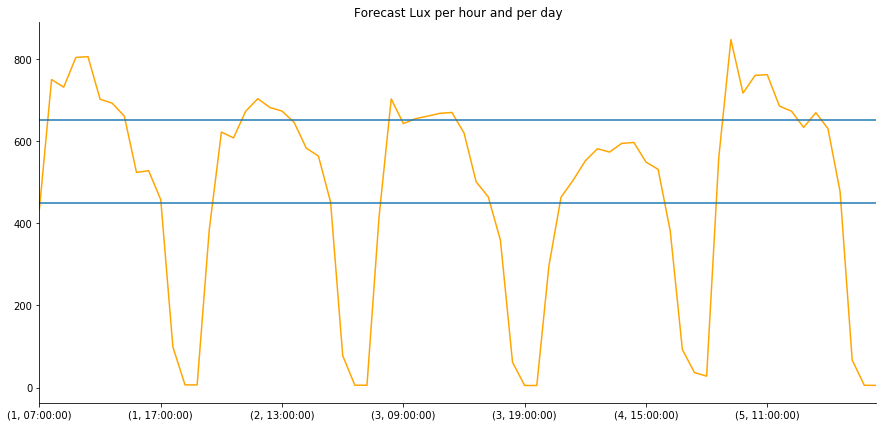

In [271]:
plt.figure(figsize=(15, 7))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
forecasted_lux["Fore_Lux"].plot(y='value', color='orange',ax=ax)
p1 = [1,450]
p2 = [8,450]
p3 = [1,650]
p4 = [8,650]

plt.title("Forecast Lux per hour and per day")
#plt.xticks(Lux["hour_of_timestamp"])
newline(p1,p2)
newline(p3,p4)

In [61]:
#Computing the initial/first cost of lack of comfort 
forecasted_lux["cost_lack_of_comfort"] = ""
forecasted_lux['cost_lack_of_comfort'] = pd.to_numeric(forecasted_lux.cost_lack_of_comfort, errors='coerce')
forecasted_lux.loc[forecasted_lux['Fore_Lux'] < 450, 'cost_lack_of_comfort'] = (450 -forecasted_lux.Fore_Lux)*0.01*1
forecasted_lux.loc[forecasted_lux['Fore_Lux'] > 650, 'cost_lack_of_comfort'] = (forecasted_lux.Fore_Lux-650)*0.01*1
forecasted_lux=forecasted_lux.fillna(0)
#Let's call this the case0
Case0=forecasted_lux
Case0

,weekday,hour_of_timestamp,Avg_Lux,clouds_%,Fore_Lux,cost_lack_of_comfort
0,1,7,434.992937,0.00,434.992937,0.150071
1,1,8,749.328726,0.00,749.328726,0.993287
2,1,9,754.817221,0.08,730.663069,0.806631
3,1,10,829.565726,0.08,803.019623,1.530196
4,1,11,831.616192,0.08,805.004474,1.550045
...,...,...,...,...,...,...
65,5,16,811.906966,0.56,630.039806,0.000000
66,5,17,614.667594,0.56,476.982053,0.000000
67,5,18,98.280074,0.80,66.830451,3.831695
68,5,19,7.935589,0.80,5.396200,4.446038


In [62]:
total_cost_average1 = Case0.cost_lack_of_comfort.sum()
print('The total cost for lack of comfort for a typical week on average is €', "%.2f" % total_cost_average1 )

The total cost for lack of comfort for a typical week on average is € 80.55


# Case0_lights: Open Curtains and  lights


Assuming that Curtains can only be set in the same position at the beginning of the week for all the days of the week, we are going to
explore the 3 scenario  with  3 different curtains positions and for each of them what is the best light schedule in order
to minimize costs. 
We start optimizing lights schedule for Case0 named Case0.light

In [63]:
Case0_light = Case0.copy(deep=True)

In [64]:
Case0_light.dtypes

weekday                   int64
hour_of_timestamp         int64
Avg_Lux                 float64
clouds_%                float64
Fore_Lux                float64
cost_lack_of_comfort    float64
dtype: object

We need to define a function that turn on the lights when the natural light is below 450

In [65]:
def Light_On(x):
    if x < 450:
        global a 
        a = x+450
    else:
        a = x
    return (a)


However, there some cases in which it is convenient to turn on the light even thought forecasted values are below 450. This is because increasing luminosity by +450 generates a delta above the comfort area which is larger than the original.
This issue can be solved by the following equation:

Delta_up = Delta down

x + Delta_light - 650 = 450 - x

Neon case) x + 450 - 650 = 450 - x ||| x = 325

Led case) x +225 -650 = 450 - x ||| x = 437,5

Where:

x = light level after which it is not convenient to turn on the light

Delta_down = luminosity missing to reach the minimum comfort level

Delta_up = luminosity exceeding the maximum comfort level

Delta_light = luminosity increase given by turning on the light

We should aslo consider the cost of neon light in determining the limit after which for turning the light on (ex. 325-0.432). However, given the limited cost we assume that the generous rector of the Politecnico di Milano will prefer employees' comfort compared to saving few cents per hour.

In [66]:
def Neon_on(l):
    if l < 325 :
        global a 
        a = l+450
    else:
        a = l
    return (a)

In [67]:
Case0_light['f_lux_adj'] = Case0_light['Fore_Lux'].apply(Neon_on)

We also need a function that returns the Cost of Comfort for those luminosity values that are out of the comfort area

In [68]:
def COC(x): 
    if x < 450:
        global r
        r = (450 - x)*0.01
    elif x > 650:
        r = (x-650)*0.01
    else:
        r = 0
    return (r)


In [69]:
Case0_light['COC_adj'] = Case0_light['f_lux_adj'].apply(COC)

In [70]:
Case0_light['lights'] = np.where(Case0_light['Fore_Lux'] < Case0_light['f_lux_adj'] , 1, 0)

In [71]:
#Case0_light['lights']

In [72]:
#Case0_light

In [73]:
Case0_light['light_cost'] = Case0_light['lights'].apply(lambda x: x*0.432)

#Note that 0.432 is the cost a one hour of light consumption. 0.432 = 12 * 4 * 0.03 * 0.3€

In [74]:
#Case0_light['light_cost'].sum()

In [75]:
#Case0_light['COC_adj'].sum()

In [76]:
Case0_light['Tot_cost'] = Case0_light['COC_adj'] + Case0_light['light_cost'] 
Case0_light

,weekday,hour_of_timestamp,Avg_Lux,clouds_%,Fore_Lux,cost_lack_of_comfort,f_lux_adj,COC_adj,lights,light_cost,Tot_cost
0,1,7,434.992937,0.00,434.992937,0.150071,434.992937,0.150071,0,0.000,0.150071
1,1,8,749.328726,0.00,749.328726,0.993287,749.328726,0.993287,0,0.000,0.993287
2,1,9,754.817221,0.08,730.663069,0.806631,730.663069,0.806631,0,0.000,0.806631
3,1,10,829.565726,0.08,803.019623,1.530196,803.019623,1.530196,0,0.000,1.530196
4,1,11,831.616192,0.08,805.004474,1.550045,805.004474,1.550045,0,0.000,1.550045
...,...,...,...,...,...,...,...,...,...,...,...
65,5,16,811.906966,0.56,630.039806,0.000000,630.039806,0.000000,0,0.000,0.000000
66,5,17,614.667594,0.56,476.982053,0.000000,476.982053,0.000000,0,0.000,0.000000
67,5,18,98.280074,0.80,66.830451,3.831695,516.830451,0.000000,1,0.432,0.432000
68,5,19,7.935589,0.80,5.396200,4.446038,455.396200,0.000000,1,0.432,0.432000


In [77]:
print("The total  cost is €","%.2f" % Case0_light['Tot_cost'].sum()) # Cost of Comfort and lights for Case0_light

The total  cost is € 24.43


# Case30:  Curtains at 30 % and No lights

Since curtains are not authomatized, curtains filter 30% for every hour and day of the forecasted week

In [78]:
Case30 = Case0.copy(deep=True)

In [79]:
#Case0

In [80]:
Case30['f_lux_adj'] = Case0['Fore_Lux'] * 0.7

In [273]:
Case30

,weekday,hour_of_timestamp,Avg_Lux,clouds_%,Fore_Lux,cost_lack_of_comfort,f_lux_adj,COC_adj,Tot_cost
0,1,7,434.992937,0.00,434.992937,0.150071,304.495056,1.455049,1.455049
1,1,8,749.328726,0.00,749.328726,0.993287,524.530108,0.000000,0.000000
2,1,9,754.817221,0.08,730.663069,0.806631,511.464149,0.000000,0.000000
3,1,10,829.565726,0.08,803.019623,1.530196,562.113736,0.000000,0.000000
4,1,11,831.616192,0.08,805.004474,1.550045,563.503132,0.000000,0.000000
5,1,12,851.181884,0.44,701.373872,0.513739,490.961711,0.000000,0.000000
6,1,13,839.435786,0.44,691.695088,0.416951,484.186562,0.000000,0.000000
7,1,14,800.954072,0.44,659.986156,0.099862,461.990309,0.000000,0.000000
8,1,15,718.883411,0.68,523.347123,0.000000,366.342986,0.836570,0.836570
9,1,16,724.608147,0.68,527.514731,0.000000,369.260312,0.807397,0.807397


In [82]:
Case30['COC_adj'] = Case30['f_lux_adj'].apply(COC)

In [83]:
Case30['Tot_cost'] = Case30['COC_adj'] #as there are no lights in this scenario

In [84]:
print("The total initial cost is €","%.2f" % Case30['Tot_cost'].sum()) # Cost of Comfort and lights for Case0_light

The total initial cost is € 90.96


# Case30_light: Curtains at 30 % and lights

The curtains set in such way that they are filtering 60% of the sunlight. The neon lights are not used to compensate the lack of luminosity.

In [85]:
Case30L = Case0.copy(deep=True)

In [86]:
#Case0

In [87]:
Case30L['f_lux_adj1'] = Case0['Fore_Lux']*0.7

In [88]:
Case30L['f_lux_adj2'] = Case30L['f_lux_adj1'].apply(Neon_on)

In [89]:
Case30L

,weekday,hour_of_timestamp,Avg_Lux,clouds_%,Fore_Lux,cost_lack_of_comfort,f_lux_adj1,f_lux_adj2
0,1,7,434.992937,0.00,434.992937,0.150071,304.495056,754.495056
1,1,8,749.328726,0.00,749.328726,0.993287,524.530108,524.530108
2,1,9,754.817221,0.08,730.663069,0.806631,511.464149,511.464149
3,1,10,829.565726,0.08,803.019623,1.530196,562.113736,562.113736
4,1,11,831.616192,0.08,805.004474,1.550045,563.503132,563.503132
...,...,...,...,...,...,...,...,...
65,5,16,811.906966,0.56,630.039806,0.000000,441.027864,441.027864
66,5,17,614.667594,0.56,476.982053,0.000000,333.887437,333.887437
67,5,18,98.280074,0.80,66.830451,3.831695,46.781315,496.781315
68,5,19,7.935589,0.80,5.396200,4.446038,3.777340,453.777340


In [90]:
Case30L['COC_adj'] = Case30L['f_lux_adj2'].apply(COC)

In [91]:
Case30L['lights'] = np.where(Case30L['f_lux_adj1'] < Case30L['f_lux_adj2'] , 1, 0) #we are sure that using the curtains f_lux_adj did not increse

In [92]:
Case30L['light_cost'] = Case30L['lights']*0.432

In [93]:
Case30L['Tot_cost'] = Case30L['COC_adj'] + Case30L['light_cost']
Case30L

,weekday,hour_of_timestamp,Avg_Lux,clouds_%,Fore_Lux,cost_lack_of_comfort,f_lux_adj1,f_lux_adj2,COC_adj,lights,light_cost,Tot_cost
0,1,7,434.992937,0.00,434.992937,0.150071,304.495056,754.495056,1.044951,1,0.432,1.476951
1,1,8,749.328726,0.00,749.328726,0.993287,524.530108,524.530108,0.000000,0,0.000,0.000000
2,1,9,754.817221,0.08,730.663069,0.806631,511.464149,511.464149,0.000000,0,0.000,0.000000
3,1,10,829.565726,0.08,803.019623,1.530196,562.113736,562.113736,0.000000,0,0.000,0.000000
4,1,11,831.616192,0.08,805.004474,1.550045,563.503132,563.503132,0.000000,0,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
65,5,16,811.906966,0.56,630.039806,0.000000,441.027864,441.027864,0.089721,0,0.000,0.089721
66,5,17,614.667594,0.56,476.982053,0.000000,333.887437,333.887437,1.161126,0,0.000,1.161126
67,5,18,98.280074,0.80,66.830451,3.831695,46.781315,496.781315,0.000000,1,0.432,0.432000
68,5,19,7.935589,0.80,5.396200,4.446038,3.777340,453.777340,0.000000,1,0.432,0.432000


In [94]:
print("The total initial cost is €","%.2f" % Case30L['Tot_cost'].sum()) # Cost of Comfort and lights for Case0_light

The total initial cost is € 30.29


# Case60: Curtains at 60 % and no lights

The curtains set in such way that they are filtering 60% of the sunlight. The neon lights are not used to compensate the lack of luminosity.

In [95]:
Case60 = Case0.copy(deep=True)

In [96]:
Case0

,weekday,hour_of_timestamp,Avg_Lux,clouds_%,Fore_Lux,cost_lack_of_comfort
0,1,7,434.992937,0.00,434.992937,0.150071
1,1,8,749.328726,0.00,749.328726,0.993287
2,1,9,754.817221,0.08,730.663069,0.806631
3,1,10,829.565726,0.08,803.019623,1.530196
4,1,11,831.616192,0.08,805.004474,1.550045
...,...,...,...,...,...,...
65,5,16,811.906966,0.56,630.039806,0.000000
66,5,17,614.667594,0.56,476.982053,0.000000
67,5,18,98.280074,0.80,66.830451,3.831695
68,5,19,7.935589,0.80,5.396200,4.446038


In [97]:
Case60['f_lux_adj'] = Case0['Fore_Lux'] * 0.4

In [98]:
Case60['COC_adj'] = Case60['f_lux_adj'].apply(COC)

In [99]:
Case60['Tot_cost'] = Case60['COC_adj'] #as there are no lights in this scenario

In [100]:
Case60

,weekday,hour_of_timestamp,Avg_Lux,clouds_%,Fore_Lux,cost_lack_of_comfort,f_lux_adj,COC_adj,Tot_cost
0,1,7,434.992937,0.00,434.992937,0.150071,173.997175,2.760028,2.760028
1,1,8,749.328726,0.00,749.328726,0.993287,299.731490,1.502685,1.502685
2,1,9,754.817221,0.08,730.663069,0.806631,292.265228,1.577348,1.577348
3,1,10,829.565726,0.08,803.019623,1.530196,321.207849,1.287922,1.287922
4,1,11,831.616192,0.08,805.004474,1.550045,322.001790,1.279982,1.279982
...,...,...,...,...,...,...,...,...,...
65,5,16,811.906966,0.56,630.039806,0.000000,252.015922,1.979841,1.979841
66,5,17,614.667594,0.56,476.982053,0.000000,190.792821,2.592072,2.592072
67,5,18,98.280074,0.80,66.830451,3.831695,26.732180,4.232678,4.232678
68,5,19,7.935589,0.80,5.396200,4.446038,2.158480,4.478415,4.478415


In [101]:
print("The total initial cost is €","%.2f" % Case60['Tot_cost'].sum()) # Cost of Comfort and lights for Case60

The total initial cost is € 180.78


# Case60_light: Curtains at 60 % and lights

The curtains set in such way that they are filtering 60% of the sunlight. The neon lights are turned on to compensate the lack of luminosity if needed, in order to respect the comfort range.

In [102]:
Case60L = Case0.copy(deep=True)

In [103]:
Case60L

,weekday,hour_of_timestamp,Avg_Lux,clouds_%,Fore_Lux,cost_lack_of_comfort
0,1,7,434.992937,0.00,434.992937,0.150071
1,1,8,749.328726,0.00,749.328726,0.993287
2,1,9,754.817221,0.08,730.663069,0.806631
3,1,10,829.565726,0.08,803.019623,1.530196
4,1,11,831.616192,0.08,805.004474,1.550045
...,...,...,...,...,...,...
65,5,16,811.906966,0.56,630.039806,0.000000
66,5,17,614.667594,0.56,476.982053,0.000000
67,5,18,98.280074,0.80,66.830451,3.831695
68,5,19,7.935589,0.80,5.396200,4.446038


In [104]:
Case60L['f_lux_adj1'] = Case0['Fore_Lux']*0.4

In [105]:
Case60L['f_lux_adj2'] = Case60L['f_lux_adj1'].apply(Neon_on)

In [106]:
Case60L['COC_adj'] = Case60L['f_lux_adj2'].apply(COC)

In [107]:
Case60L['lights'] = np.where(Case60L['f_lux_adj1'] < Case60L['f_lux_adj2'] , 1, 0) 

In [108]:
Case60L['light_cost'] = Case60L['lights']*0.432

In [109]:
Case60L['light_cost'].sum()

29.807999999999993

In [110]:
Case60L['Tot_cost'] = Case60L['COC_adj'] + Case60L['light_cost']

In [111]:
Case60L

,weekday,hour_of_timestamp,Avg_Lux,clouds_%,Fore_Lux,cost_lack_of_comfort,f_lux_adj1,f_lux_adj2,COC_adj,lights,light_cost,Tot_cost
0,1,7,434.992937,0.00,434.992937,0.150071,173.997175,623.997175,0.000000,1,0.432,0.432000
1,1,8,749.328726,0.00,749.328726,0.993287,299.731490,749.731490,0.997315,1,0.432,1.429315
2,1,9,754.817221,0.08,730.663069,0.806631,292.265228,742.265228,0.922652,1,0.432,1.354652
3,1,10,829.565726,0.08,803.019623,1.530196,321.207849,771.207849,1.212078,1,0.432,1.644078
4,1,11,831.616192,0.08,805.004474,1.550045,322.001790,772.001790,1.220018,1,0.432,1.652018
...,...,...,...,...,...,...,...,...,...,...,...,...
65,5,16,811.906966,0.56,630.039806,0.000000,252.015922,702.015922,0.520159,1,0.432,0.952159
66,5,17,614.667594,0.56,476.982053,0.000000,190.792821,640.792821,0.000000,1,0.432,0.432000
67,5,18,98.280074,0.80,66.830451,3.831695,26.732180,476.732180,0.000000,1,0.432,0.432000
68,5,19,7.935589,0.80,5.396200,4.446038,2.158480,452.158480,0.000000,1,0.432,0.432000


In [112]:
print("The total initial cost is €","%.2f" % Case60L['Tot_cost'].sum()) # Cost of Comfort and lights for Case60 with Lights

The total initial cost is € 55.40


In [113]:
#The schedule for the best option: Open curtains and lights on. 
Case0_light[['weekday', 'hour_of_timestamp', 'lights']].loc[Case0_light['lights'] == 1]

,weekday,hour_of_timestamp,lights
11,1,18,1
12,1,19,1
13,1,20,1
25,2,18,1
26,2,19,1
27,2,20,1
39,3,18,1
40,3,19,1
41,3,20,1
42,4,7,1


# LED INVESTMENT


With the introduction of the new led light we can have an increase of +450 of lumnosity or only +225 when power consumption it is at 50%. This flexibility is also accompanied by cheaper cost of lightening per hr of the whole systme. From 12 * 4* 0.03* 0.3= 0.432 € in the Neon Scenario,   to 0.3 * 0.3 = 0.09 and 0.3 * 0.5 = 0.15€ per hr in the 50% and 100% power comsumption in case of led implementation. For such reasons we intuitevly expect better result in terms of total cost of comforts

In [114]:
Case_0_led = Case0.copy(deep=True)

We need to define a new lightening function that sets new triggering limits

In [115]:
def Led_On(l):
    if l > 225 and l < 437.5:
        global a 
        a = l+225
        
    elif l > 0 and l < 225:
        a = l+450
    else:
        a = l
    return (a)

In [116]:
Case_0_led['f_lux_adj'] = Case_0_led['Fore_Lux'].apply(Led_On)

In [117]:
#Case_0_led

In [118]:
Case_0_led['50%power'] = np.where( Case_0_led['Fore_Lux']+225 == Case_0_led['f_lux_adj'] , 1, 0) 
#to compute in which hours the led has been switched on at 50% of power

In [119]:
Case_0_led['50%power'].sum()

6

In [120]:
Case_0_led['100%power'] = np.where( Case_0_led['Fore_Lux']+450 == Case_0_led['f_lux_adj'] , 1, 0) 
#to compute in which hours the led has been switched on at 100% of power

In [121]:
Case_0_led['100%power'].sum()

15

In [122]:
Case_0_led['COC_adj'] = Case_0_led['f_lux_adj'].apply(COC)

In [123]:
Case_0_led['COC_adj'].sum()

13.916919611117612

In [124]:
Case_0_led['50%power_cost'] = Case_0_led['50%power']*0.09

In [125]:
Case_0_led['100%power_cost'] = Case_0_led['100%power']*0.15

In [126]:
Case_0_led['Tot_cost'] = Case_0_led['COC_adj'] + Case_0_led['50%power_cost'] + Case_0_led['100%power_cost'] 

In [127]:
Case_0_led

,weekday,hour_of_timestamp,Avg_Lux,clouds_%,Fore_Lux,cost_lack_of_comfort,f_lux_adj,50%power,100%power,COC_adj,50%power_cost,100%power_cost,Tot_cost
0,1,7,434.992937,0.00,434.992937,0.150071,659.992937,1,0,0.099929,0.09,0.00,0.189929
1,1,8,749.328726,0.00,749.328726,0.993287,749.328726,0,0,0.993287,0.00,0.00,0.993287
2,1,9,754.817221,0.08,730.663069,0.806631,730.663069,0,0,0.806631,0.00,0.00,0.806631
3,1,10,829.565726,0.08,803.019623,1.530196,803.019623,0,0,1.530196,0.00,0.00,1.530196
4,1,11,831.616192,0.08,805.004474,1.550045,805.004474,0,0,1.550045,0.00,0.00,1.550045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,5,16,811.906966,0.56,630.039806,0.000000,630.039806,0,0,0.000000,0.00,0.00,0.000000
66,5,17,614.667594,0.56,476.982053,0.000000,476.982053,0,0,0.000000,0.00,0.00,0.000000
67,5,18,98.280074,0.80,66.830451,3.831695,516.830451,0,1,0.000000,0.00,0.15,0.150000
68,5,19,7.935589,0.80,5.396200,4.446038,455.396200,0,1,0.000000,0.00,0.15,0.150000


In [128]:
Case_0_led['Tot_cost'].sum()

16.706919611117605

## Case 30 Led: Curtains at 30% and led on

In [129]:
Case0

,weekday,hour_of_timestamp,Avg_Lux,clouds_%,Fore_Lux,cost_lack_of_comfort
0,1,7,434.992937,0.00,434.992937,0.150071
1,1,8,749.328726,0.00,749.328726,0.993287
2,1,9,754.817221,0.08,730.663069,0.806631
3,1,10,829.565726,0.08,803.019623,1.530196
4,1,11,831.616192,0.08,805.004474,1.550045
...,...,...,...,...,...,...
65,5,16,811.906966,0.56,630.039806,0.000000
66,5,17,614.667594,0.56,476.982053,0.000000
67,5,18,98.280074,0.80,66.830451,3.831695
68,5,19,7.935589,0.80,5.396200,4.446038


In [130]:
Case_30_led = Case0.copy(deep=True)

In [131]:
Case_30_led['f_lux_adj1'] = Case_30_led['Fore_Lux'] * 0.6

In [132]:
Case_30_led['f_lux_adj2'] = Case_30_led['f_lux_adj1'].apply(Led_On)

In [133]:
#Case_30_led

In [134]:
Case_30_led['COC_adj'] = Case_30_led['f_lux_adj2'].apply(COC)

In [135]:
Case_30_led['COC_adj'].sum()

0.3190347502130374

In [136]:
Case_30_led['100%power'] = np.where( Case_30_led['f_lux_adj1'] +450 == Case_30_led['f_lux_adj2'] , 1, 0) 

In [137]:
Case_30_led['100%power'].sum()

17

In [138]:
Case_30_led['50%power'] = np.where( Case_30_led['f_lux_adj1'] +225 == Case_30_led['f_lux_adj2'] , 1, 0) 

In [139]:
Case_30_led['50%power'].sum()

46

In [140]:
Case_30_led['50%power_cost'] = Case_30_led['50%power']*0.09

In [141]:
Case_30_led['50%power_cost'].sum()

4.14

In [142]:
Case_30_led['100%power_cost'] = Case_30_led['100%power']*0.15

In [143]:
Case_30_led['100%power_cost'].sum()

2.5499999999999994

In [144]:
Case_30_led['Tot_cost'] = Case_30_led['COC_adj'] + Case_30_led['50%power_cost'] + Case_30_led['100%power_cost'] 

In [145]:
Case_30_led['Tot_cost'].sum()

7.009034750213037

## Case 60 Led: No Curtains at 60% and led on

In [147]:
Case_60_led = Case0.copy(deep=True)
Case_60_led['f_lux_adj1'] = Case0['Fore_Lux'] * 0.4
Case_60_led['f_lux_adj2'] = Case_60_led['f_lux_adj1'].apply(Led_On)

In [149]:
Case_60_led

,weekday,hour_of_timestamp,Avg_Lux,clouds_%,Fore_Lux,cost_lack_of_comfort,f_lux_adj1,f_lux_adj2
0,1,7,434.992937,0.00,434.992937,0.150071,173.997175,623.997175
1,1,8,749.328726,0.00,749.328726,0.993287,299.731490,524.731490
2,1,9,754.817221,0.08,730.663069,0.806631,292.265228,517.265228
3,1,10,829.565726,0.08,803.019623,1.530196,321.207849,546.207849
4,1,11,831.616192,0.08,805.004474,1.550045,322.001790,547.001790
...,...,...,...,...,...,...,...,...
65,5,16,811.906966,0.56,630.039806,0.000000,252.015922,477.015922
66,5,17,614.667594,0.56,476.982053,0.000000,190.792821,640.792821
67,5,18,98.280074,0.80,66.830451,3.831695,26.732180,476.732180
68,5,19,7.935589,0.80,5.396200,4.446038,2.158480,452.158480


In [304]:
Case_60_led['50%power'] = np.where(Case_60_led['f_lux_adj1']+225 == Case_60_led['f_lux_adj2'] , 1, 0) 
Case_60_led['50%power'].sum()

36

In [303]:
Case_60_led['100%power'] = np.where(Case_60_led['f_lux_adj1']+450 == Case_60_led['f_lux_adj2'] , 1, 0) 
Case_60_led['100%power'].sum()

34

In [301]:
Case_60_led['COC_adj'] = Case_60_led['f_lux_adj2'].apply(COC)
Case_60_led['COC_adj'].sum()

0.9846561045703323

In [156]:
Case_60_led['50%power_cost'] = Case_60_led['50%power']*0.09

In [157]:
Case_60_led['100%power_cost'] = Case_60_led['100%power']*0.15

In [300]:
Case_60_led['Tot_cost'] = Case_60_led['COC_adj'] + Case_60_led['50%power_cost'] + Case_60_led['100%power_cost'] 
Case_60_led['Tot_cost'].sum()

9.324656104570334

In [160]:
Case_60_led

,weekday,hour_of_timestamp,Avg_Lux,clouds_%,Fore_Lux,cost_lack_of_comfort,f_lux_adj1,f_lux_adj2,50%power,100%power,COC_adj,50%power_cost,100%power_cost,Tot_cost
0,1,7,434.992937,0.00,434.992937,0.150071,173.997175,623.997175,0,1,0.0,0.00,0.15,0.15
1,1,8,749.328726,0.00,749.328726,0.993287,299.731490,524.731490,1,0,0.0,0.09,0.00,0.09
2,1,9,754.817221,0.08,730.663069,0.806631,292.265228,517.265228,1,0,0.0,0.09,0.00,0.09
3,1,10,829.565726,0.08,803.019623,1.530196,321.207849,546.207849,1,0,0.0,0.09,0.00,0.09
4,1,11,831.616192,0.08,805.004474,1.550045,322.001790,547.001790,1,0,0.0,0.09,0.00,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,5,16,811.906966,0.56,630.039806,0.000000,252.015922,477.015922,1,0,0.0,0.09,0.00,0.09
66,5,17,614.667594,0.56,476.982053,0.000000,190.792821,640.792821,0,1,0.0,0.00,0.15,0.15
67,5,18,98.280074,0.80,66.830451,3.831695,26.732180,476.732180,0,1,0.0,0.00,0.15,0.15
68,5,19,7.935589,0.80,5.396200,4.446038,2.158480,452.158480,0,1,0.0,0.00,0.15,0.15


# Curtains' Automatization

In [285]:
auto = Case0.copy(deep=True)
#auto

In [286]:
auto["f_lux_adj"] = auto.Fore_Lux

f_lux_adj=pd.Series(auto["Fore_Lux"])
auto['lights']=''
auto['curtains']=0
auto['neon_cost']=0
auto['curtains'] = pd.to_numeric(auto.curtains, errors='coerce')
auto['lights'] = pd.to_numeric(auto.lights, errors='coerce')
type(f_lux_adj)
for i in auto["Fore_Lux"]:
 
    if i > 650:
        
        auto.loc[forecasted_lux['Fore_Lux'] >650, 'f_lux_adj'] = auto.Fore_Lux *0.7 #(1-0.3)
        auto.loc[forecasted_lux['Fore_Lux'] >650, 'curtains'] = 0.3
        #print(">650")
 
    elif i < 450:
        
        auto.loc[forecasted_lux['Fore_Lux'] < 450, 'f_lux_adj'] = forecasted_lux.Fore_Lux +450
        auto.loc[forecasted_lux['Fore_Lux'] < 450, 'lights'] = 1
        auto.loc[forecasted_lux['Fore_Lux'] < 450, 'neon_cost'] = 0.0003*30*12*4
        #print("<450")
                     
    else:
          
        auto.lights=0
        #print("range")

In [287]:
for i in auto['f_lux_adj']:
    if i>650:
        auto.loc[auto['f_lux_adj']>650, 'curtains'] =0.3
        auto.loc[auto['f_lux_adj']>650, 'f_lux_adj'] = auto.f_lux_adj *0.7

In [266]:
#auto

In [288]:
cost_auto= auto.neon_cost.sum()
print(cost_auto)

9.072


In [202]:
auto['new_hour']=pd.to_datetime(auto.hour_of_timestamp, format='%H').dt.time
auto.set_index(['new_hour'])

,weekday,hour_of_timestamp,Avg_Lux,clouds_%,Fore_Lux,cost_lack_of_comfort,f_lux_adj,lights,curtains,neon_cost
new_hour,,,,,,,,,,
07:00:00,1,7,434.992937,0.00,434.992937,0.150071,619.495056,1,0.3,0.432
08:00:00,1,8,749.328726,0.00,749.328726,0.993287,524.530108,0,0.3,0.000
09:00:00,1,9,754.817221,0.08,730.663069,0.806631,511.464149,0,0.3,0.000
10:00:00,1,10,829.565726,0.08,803.019623,1.530196,562.113736,0,0.3,0.000
11:00:00,1,11,831.616192,0.08,805.004474,1.550045,563.503132,0,0.3,0.000
12:00:00,1,12,851.181884,0.44,701.373872,0.513739,490.961711,0,0.3,0.000
13:00:00,1,13,839.435786,0.44,691.695088,0.416951,484.186562,0,0.3,0.000
14:00:00,1,14,800.954072,0.44,659.986156,0.099862,461.990309,0,0.3,0.000
15:00:00,1,15,718.883411,0.68,523.347123,0.000000,523.347123,0,0.0,0.000


In [200]:
auto_schedule = auto[['lights','curtains']]

In [204]:
auto_schedule

lights  curtains
1 07:00:00       1       0.3
  08:00:00       0       0.3
  09:00:00       0       0.3
  10:00:00       0       0.3
  11:00:00       0       0.3
  12:00:00       0       0.3
  13:00:00       0       0.3
  14:00:00       0       0.3
  15:00:00       0       0.0
  16:00:00       0       0.0
  17:00:00       0       0.0
  18:00:00       1       0.0
  19:00:00       1       0.0
  20:00:00       1       0.0
2 07:00:00       1       0.3
  08:00:00       0       0.0
  09:00:00       0       0.0
  10:00:00       0       0.3
  11:00:00       0       0.3
  12:00:00       0       0.3
  13:00:00       0       0.3
  14:00:00       0       0.0
  15:00:00       0       0.0
  16:00:00       0       0.0
  17:00:00       0       0.0
  18:00:00       1       0.0
  19:00:00       1       0.0
  20:00:00       1       0.0
3 07:00:00       1       0.3
  08:00:00       0       0.3
  09:00:00       0       0.0
  10:00:00       0       0.3
  11:00:00       0       0.3
  12:00:00       0       0.3
  13:00:00       0       0.3
  14:00:00       0       0.0
  15:00:00       0       0.0
  16:00:00       0       0.0
  17:00:00       1       0.3
  18:00:00       1       0.0
  19:00:00       1       0.0
  20:00:00       1       0.0
4 07:00:00       1       0.3
  08:00:00       0       0.0
  09:00:00       0       0.0
  10:00:00       0       0.0
  11:00:00       0       0.0
  12:00:00       0       0.0
  13:00:00       0       0.0
  14:00:00       0       0.0
  15:00:00       0       0.0
  16:00:00       0       0.0
  17:00:00       1       0.3
  18:00:00       1       0.0
  19:00:00       1       0.0
  20:00:00       1       0.0
5 07:00:00       0       0.0
  08:00:00       0       0.3
  09:00:00       0       0.3
  10:00:00       0       0.3
  11:00:00       0       0.3
  12:00:00       0       0.3
  13:00:00       0       0.3
  14:00:00       0       0.0
  15:00:00       0       0.3
  16:00:00       0       0.0
  17:00:00       0       0.0
  18:00:00       1       0.0
  19:00:00       1       0.0
  20:00:00       1       0.0

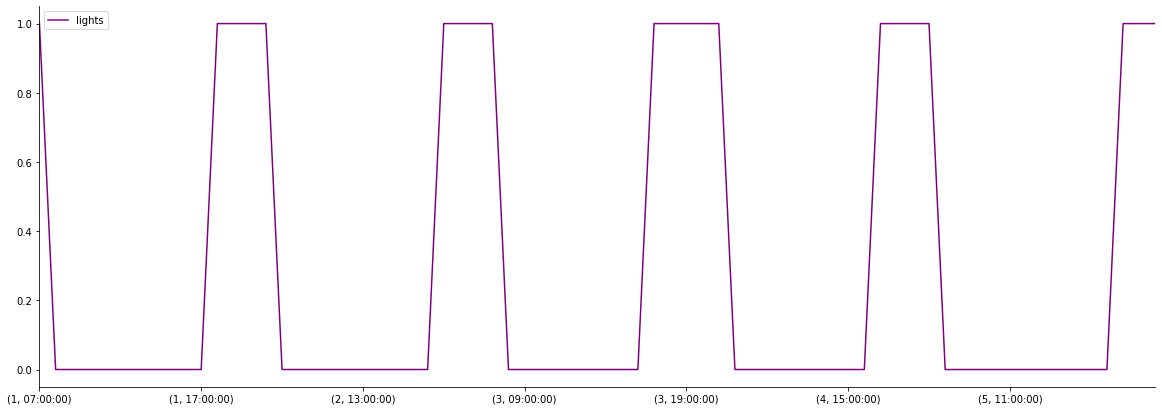

In [284]:
plt.figure(figsize=(20, 7))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
auto.plot(y='lights', color='purple',ax=ax)

# Automatic Curtains  and LED Investment

Even thought it was not required we decided to assess  the benefits of the two investments. 
We first schedule the curtains because, contrary to turning the led system on, the curtains positioning is free. Thus, it is more convenient to adjust the curtains and secondly pay the cost of lightening in case the comfort zone for certain hour has not been reached.

The following function sets curtains in order to reduce values for which forecasted light natural level is above 650 

In [173]:
def move_curtains(l):
    if l > 650 and l < 928:
        global a 
        a = l*0.7
    elif l > 928:
        a = l*0.4
    else:
        a = l
    return (a)

928 is the level of luminosity after which it is better to set curtains at 60%, while for values in between 650-928 30% reduction is more convenient to reach the comfort zone.

In [227]:
Case_double_I = Case0
Case_double_I['f_lux_adj1'] = Case_double_I['Fore_Lux'].apply(move_curtains)

In [258]:
Case_double_I['C_at_30%'] = np.where(Case_double_I['f_lux_adj1']  == Case_double_I['Fore_Lux'] *0.7 , 1, 0) 
Case_double_I['C_at_30%'].sum()

23

In [259]:
Case_double_I['C_at_60%'] = np.where(Case_double_I['f_lux_adj1']  == Case_double_I['Fore_Lux'] *0.4 , 1, 0) 
Case_double_I['C_at_60%'].sum() #as expected because max natural light value is 898 that is below 928. 

0

In [260]:
Case_double_I['COC_adj1'] = Case_double_I['f_lux_adj1'].apply(COC)
Case_double_I['COC_adj1'].sum()

66.73051287497583

In [235]:
Case_double_I['lights']=0
for i in Case_double_I["f_lux_adj1"]:
    if i < 450:
        Case_double_I.loc[Case_double_I["f_lux_adj1"] < 450, 'lights'] = 1

In [236]:
Case_double_I['f_lux_adj2'] = Case_double_I['f_lux_adj1'].apply(Led_On)

In [265]:
Case_double_I['COC_adj2'] = Case_double_I['f_lux_adj2'].apply(COC)
Case_double_I['COC_adj2'].sum() 

0.09992936802973987

In [ ]:
#As we can see there is still a value we can optimize since we can adjust the curtain position to 30% 
Case_double_I.loc[Case_double_I['COC_adj2'] > 0 ]

In [ ]:
Case_double_I['f_lux_adj3'] = Case_double_I['f_lux_adj2'].apply(move_curtains)

In [ ]:
Case_double_I['C_at_30%.2'] = np.where(Case_double_I['f_lux_adj3']  == Case_double_I['f_lux_adj2'] *0.7 , 1, 0) 

In [ ]:
Case_double_I['C_at_30%.2'].sum()

In [ ]:
Case_double_I['COC_adj3']= Case_double_I['f_lux_adj3'].apply(COC)

In [ ]:
Case_double_I['COC_adj3'].sum() #now we can be satisfied

In [261]:
Case_double_I['50%power'] = np.where(Case_double_I['f_lux_adj1']+225 == Case_double_I['f_lux_adj2'] , 1, 0) 
Case_double_I['50%power'].sum()

6

In [262]:
Case_double_I['100%power'] = np.where(Case_double_I['f_lux_adj1']+450 == Case_double_I['f_lux_adj2'] , 1, 0)
Case_double_I['100%power'].sum()

15

In [243]:
Case_double_I['50%power_cost'] = Case_double_I['50%power']*0.09

In [244]:
Case_double_I['100%power_cost'] = Case_double_I['100%power']*0.15

In [263]:
Case_double_I['led_tot_cost'] = Case_double_I['100%power_cost']+Case_double_I['50%power_cost'] 
Case_double_I['led_tot_cost'].sum()

2.7899999999999996

In [264]:
Case_double_I['Tot_cost'] = Case_double_I['COC_adj3'] + Case_double_I['50%power_cost'] + Case_double_I['100%power_cost']
Case_double_I['Tot_cost'].sum() 

2.889929368029739

## Comparisons of the options

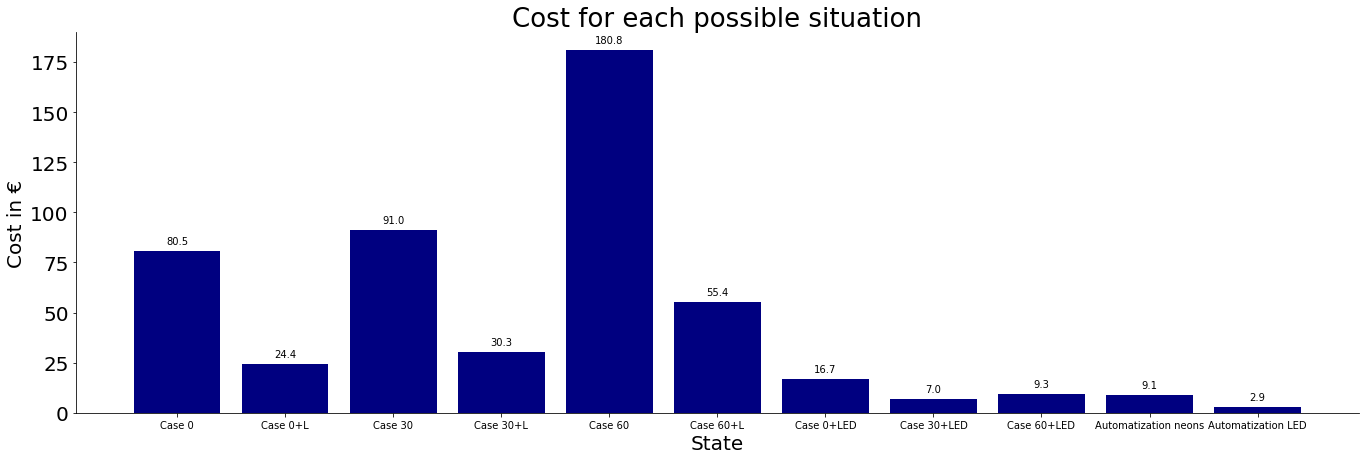

In [228]:
plt.figure(figsize=(23, 7))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
plt.bar(list2,list,color=['navy'])
plt.ylabel('Cost in €',size=20)
plt.xlabel('State',size=20)
plt.title('Cost for each possible situation',size=26)
def add_value_labels(ax, spacing=5):
    # For each bar: Place a label
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'

       
        label = "{:.1f}".format(y_value)

        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      
                                       
add_value_labels(ax)

In [327]:
list=[Case0['cost_lack_of_comfort'].sum(),Case0_light['Tot_cost'].sum(),Case30['Tot_cost'].sum(),Case30L['Tot_cost'].sum(),Case60['Tot_cost'].sum(),Case60L['Tot_cost'].sum(),Case_0_led['Tot_cost'].sum(),Case_30_led['Tot_cost'].sum(),Case_60_led['Tot_cost'].sum(),auto['neon_cost'].sum(),Case_double_I['Tot_cost'].sum()]
list2=['Case 0','Case 0+L','Case 30','Case 30+L','Case 60','Case 60+L','Case 0+LED','Case 30+LED','Case 60+LED','Automatization neons', 'Automatization LED']

In [216]:
list3 =[Case_60_led['Tot_cost'].sum(),auto['neon_cost'].sum(),Case_30_led['Tot_cost'].sum(),Case_double_I['Tot_cost'].sum()]
list4 =['Case 60+LED','Automatization neons','Case 30+LED','Automatization LED']

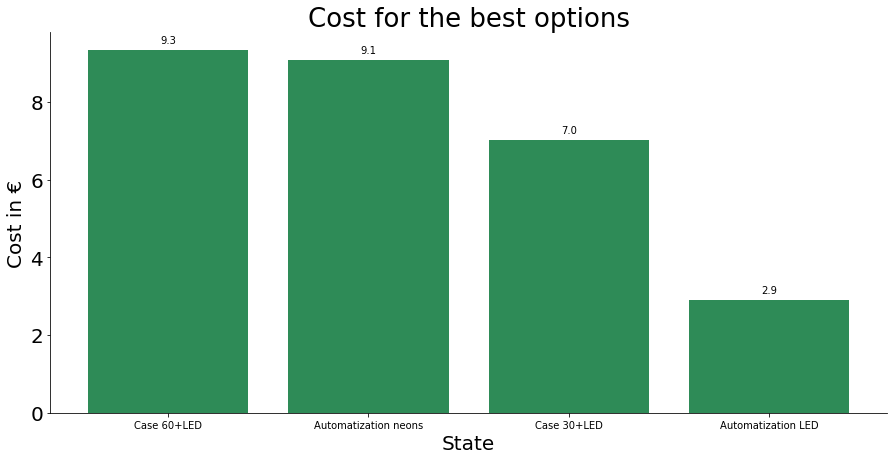

In [227]:
plt.figure(figsize=(15, 7))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
plt.bar(list4,list3,color=['seagreen'])
plt.ylabel('Cost in €',size=20)
plt.xlabel('State',size=20)
plt.title('Cost for the best options',size=26)
def add_value_labels(ax, spacing=5):
    # For each bar: Place a label
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'

       
        label = "{:.1f}".format(y_value)

        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      
                                       
add_value_labels(ax)

In [186]:
final_table =  pd.DataFrame(list, index=[list2], columns= ['Total Cost'])
final_table

,Total Cost
Case 0,80.547503
Case 0+L,24.434345
Case 30,90.956424
Case 30+L,30.287568
Case 60,180.783490
Case 60+L,55.396539
Case 0+LED,16.706920
Case 30+LED,7.009035
Case 60+LED,9.324656
Automatization neons,9.072000


In [206]:
lights =['Off','On','Off','On','Off','On','On','On','On','On','On']
light_type =['','Neon','','Neon','','Neon','LED','LED','LED','Neon','LED']
curtains=[0,0,30,30,60,60,0,30,60,'auto','auto']
cost_inv=[0,0,0,0,0,0,4000,4000,4000,2000,6000]
final_table['Lights']=lights
final_table['Light Type']=light_type
final_table['Curtains']=curtains
final_table['Cost of Investment']=cost_inv
final_table['Ammortized Investment']=final_table['Cost of Investment']/(10*52)
final_table['Final Cost']=final_table['Total Cost']+final_table['Ammortized Investment']
final_table

,Total Cost,Lights,Light Type,Curtainss,Curtains,Cost of Investment,Ammortized Investment,Final Cost
Case 0,80.547503,Off,,0,0,0,0.000000,80.547503
Case 0+L,24.434345,On,Neon,0,0,0,0.000000,24.434345
Case 30,90.956424,Off,,30,30,0,0.000000,90.956424
Case 30+L,30.287568,On,Neon,30,30,0,0.000000,30.287568
Case 60,180.783490,Off,,60,60,0,0.000000,180.783490
Case 60+L,55.396539,On,Neon,60,60,0,0.000000,55.396539
Case 0+LED,16.706920,On,LED,0,0,4000,7.692308,24.399227
Case 30+LED,7.009035,On,LED,30,30,4000,7.692308,14.701342
Case 60+LED,9.324656,On,LED,60,60,4000,7.692308,17.016964
Automatization neons,9.072000,On,Neon,auto,auto,2000,3.846154,12.918154


In [214]:
final_table.sort_values(by=['Final Cost'], inplace=True, ascending=False)

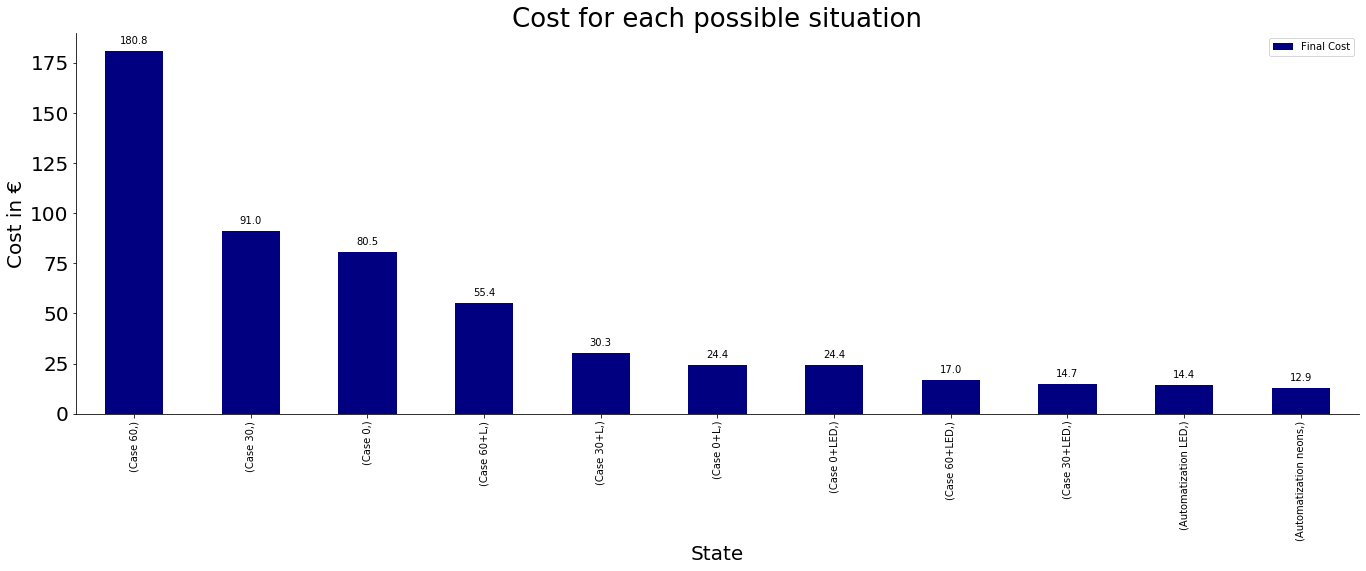

In [225]:
plt.figure(figsize=(23, 7))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
final_table.plot.bar(y='Final Cost',color=['navy'],ax=ax)
plt.ylabel('Cost in €',size=20)
plt.xlabel('State',size=20)
plt.rc('ytick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.title('Cost for each possible situation',size=26)
def add_value_labels(ax, spacing=5):
    # For each bar: Place a label
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'

       
        label = "{:.1f}".format(y_value)

        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      
                                       
add_value_labels(ax)

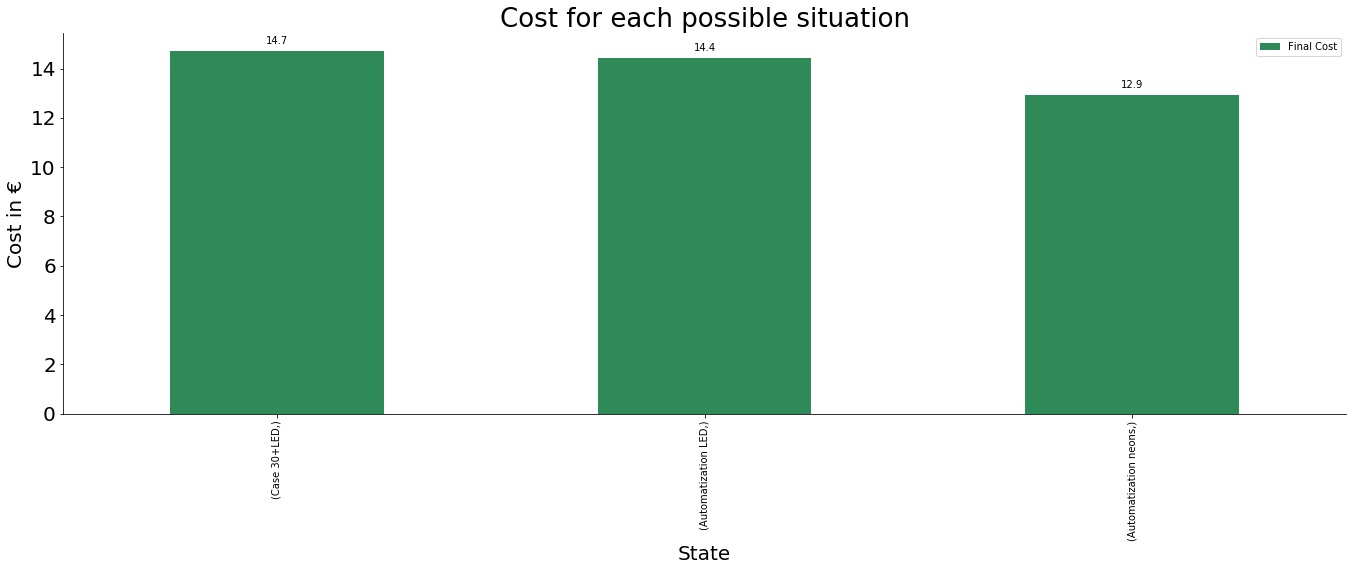

In [224]:
plt.figure(figsize=(23, 7))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
final_table.iloc[8:11].plot.bar(y='Final Cost',color=['seagreen'],ax=ax)
plt.ylabel('Cost in €',size=20)
plt.xlabel('State',size=20)
plt.title('Cost for each possible situation',size=26)
def add_value_labels(ax, spacing=5):
    # For each bar: Place a label
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'

       
        label = "{:.1f}".format(y_value)

        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      
                                       
add_value_labels(ax)

## Graphs

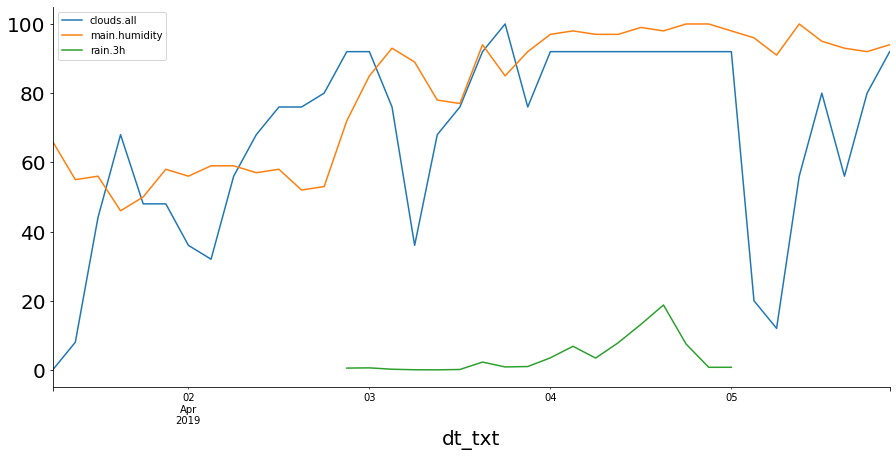

In [226]:
plt.figure(figsize=(15, 7))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
plt.xlabel('Date/Time',size=20)
weather.plot(ax=ax)

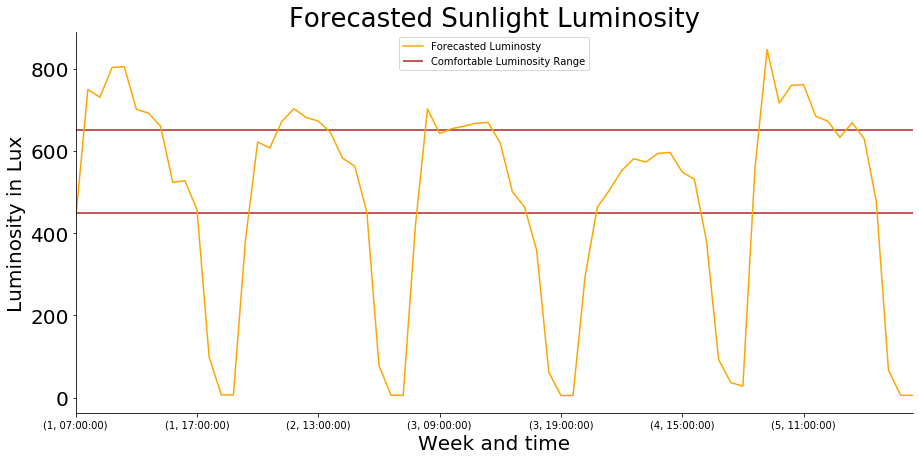

In [231]:
plt.figure(figsize=(15, 7))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
forecasted_lux.plot(y='Fore_Lux', color='orange',ax=ax)
plt.ylabel('Luminosity in Lux',size=20)
plt.xlabel('Week and time',size=20)
plt.title('Forecasted Sunlight Luminosity',size=26)
ax.hlines(650,0,100, color='firebrick')
ax.hlines(450,0,100, color='firebrick')

ax.legend(["Forecasted Luminosty", "Comfortable Luminosity Range"])

In [275]:
Case30L['new_hour']=pd.to_datetime(Case30L.hour_of_timestamp, format='%H').dt.time 
Case30L.index = pd.MultiIndex.from_arrays(Case30L[['weekday', 'new_hour']].values.T)
#helps for visualizing better the time

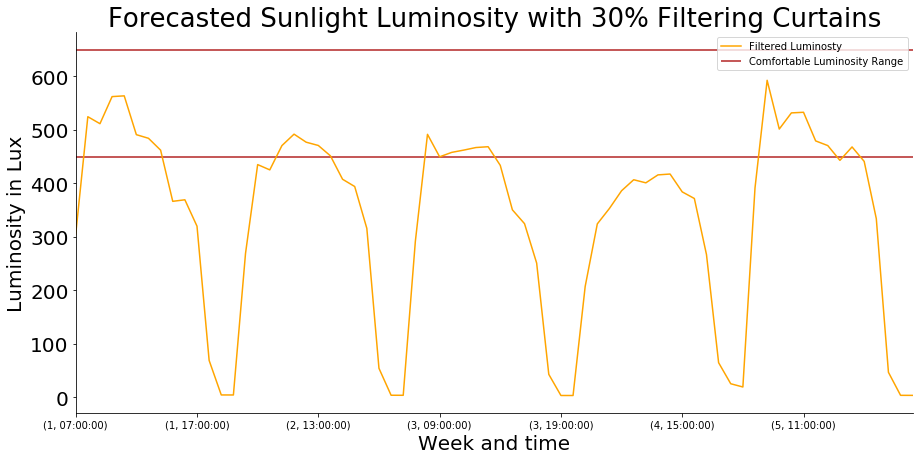

In [229]:
plt.figure(figsize=(15, 7))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
Case30L.plot(y='f_lux_adj1', color='orange',ax=ax)
plt.ylabel('Luminosity in Lux',size=20)
plt.xlabel('Week and time',size=20)
plt.title('Forecasted Sunlight Luminosity with 30% Filtering Curtains',size=26)
ax.hlines(650,0,100, color='firebrick')
ax.hlines(450,0,100, color='firebrick')

ax.legend(["Filtered Luminosty", "Comfortable Luminosity Range"])

In [279]:
Case60L['new_hour']=pd.to_datetime(Case60L.hour_of_timestamp, format='%H').dt.time 
Case60L.index = pd.MultiIndex.from_arrays(Case60L[['weekday', 'new_hour']].values.T)
#helps for visualizing better the time

Here we can easily observe that all values are below the comfortable minimum level, which means that this is not an efficient option in terms of comfort cost optimization. Additionally, it induce that neons lights will have to be switched on more often, and therefore increase the electricity costs.

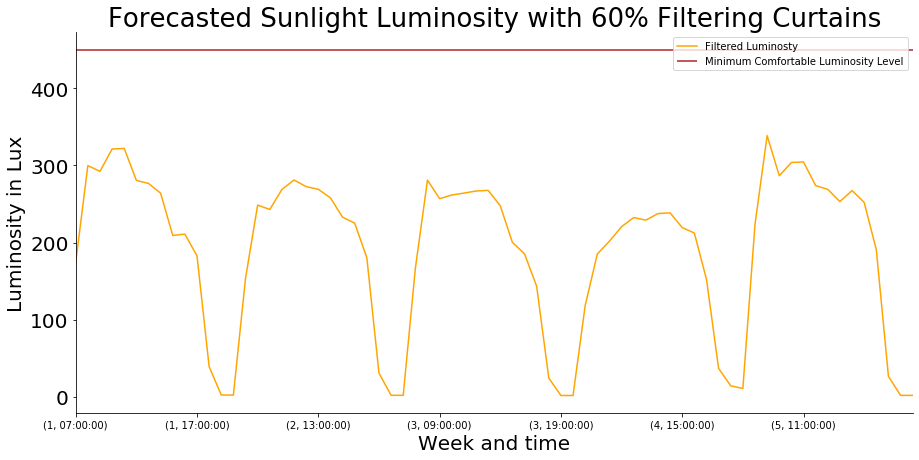

In [230]:
plt.figure(figsize=(15, 7))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False) 
ax.spines["right"].set_visible(False)
Case60L.plot(y='f_lux_adj1', color='orange',ax=ax)
plt.ylabel('Luminosity in Lux',size=20)
plt.xlabel('Week and time',size=20)
plt.title('Forecasted Sunlight Luminosity with 60% Filtering Curtains',size=26)
ax.hlines(450,0,100, color='firebrick')

ax.legend(["Filtered Luminosty", "Minimum Comfortable Luminosity Level"])